In [1]:
import torch
import torch_geometric as pyg
import matplotlib.pyplot as plt
import networkx as nx
from torch_sparse import spspmm

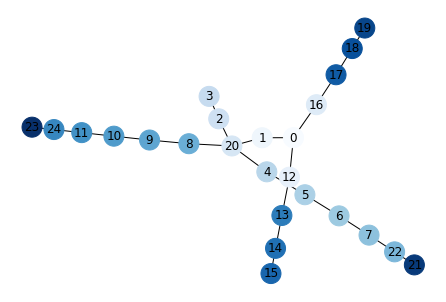

In [2]:
skeleton = [(1, 2), (2, 21), (3, 21), (4, 3), (5, 21), (6, 5), (7, 6),
             (8, 7), (9, 21), (10, 9), (11, 10), (12, 11), (13, 1),
             (14, 13), (15, 14), (16, 15), (17, 1), (18, 17), (19, 18),
             (20, 19), (22, 23), (23, 8), (24, 25), (25, 12)]
outward = [(j, i) for (i, j) in skeleton]
skeleton = skeleton + outward
sk = torch.tensor(skeleton).t() - 1
# plot skeleton
g = nx.Graph()   # undirected graph
dim = sk.shape[1]
t = pyg.utils.to_networkx(pyg.data.Data(torch.ones(dim), sk)) # directed graph
g.add_edges_from(t.edges)
pos = nx.spring_layout(g, iterations=200)
nx.draw(g, pos, node_color=range(25), node_size=400, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(g, pos)
plt.show()

In [3]:
sk = pyg.utils.from_networkx(t)
sk = sk.edge_index
print(sk)
dim = sk.shape[1]
val = torch.ones(dim)
# A^2: sk_eleton s_quare
idxc, valc = spspmm(sk, val, sk, val, 25, 25, 25)
idxc, valc

tensor([[ 0,  0,  0,  1,  1,  2,  2,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,
          9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 16, 16, 17, 17, 18,
         18, 19, 20, 20, 20, 20, 21, 22, 22, 23, 24, 24],
        [ 1, 12, 16, 20,  0, 20,  3,  2, 20,  5,  4,  6,  5,  7,  6, 22, 20,  9,
          8, 10,  9, 11, 10, 24,  0, 13, 12, 14, 13, 15, 14,  0, 17, 16, 18, 17,
         19, 18,  1,  2,  4,  8, 22,  7, 21, 24, 11, 23]])


(tensor([[ 0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  4,  4,
           4,  4,  4,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,  9,
           9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 14, 14, 15,
          15, 16, 16, 16, 16, 17, 17, 17, 18, 18, 19, 19, 20, 20, 20, 20, 20, 21,
          21, 22, 22, 23, 23, 24, 24],
         [ 0, 13, 17, 20,  1,  2,  4,  8, 12, 16,  1,  2,  4,  8,  3, 20,  1,  2,
           4,  6,  8,  5,  7, 20,  4,  6, 22,  5,  7, 21,  1,  2,  4,  8, 10,  9,
          11, 20,  8, 10, 24,  9, 11, 23,  1, 12, 14, 16,  0, 13, 15, 12, 14, 13,
          15,  1, 12, 16, 18,  0, 17, 19, 16, 18, 17, 19,  0,  3,  5,  9, 20,  7,
          21,  6, 22, 11, 23, 10, 24]]),
 tensor([3., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
         2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2.,
         1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1.,
         1., 1., 1., 

In [4]:
g2 = pyg.data.Data(edge_index=idxc)
t = pyg.utils.to_networkx(g2)
g2 = nx.Graph()
g2.add_edges_from(t.edges)

/Users/shi.feng/.pyenv/versions/3.7.7/lib/python3.7/site-packages/torch_geometric/data/data.py:198: UserWarning: The number of nodes in your data object can only be inferred by its edge indices, and hence may result in unexpected batch-wise behavior, e.g., in case there exists isolated nodes. Please consider explicitly setting the number of nodes for this data object by assigning it to data.num_nodes.
  warnings.warn(__num_nodes_warn_msg__.format('edge'))


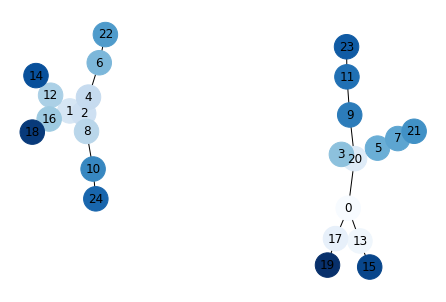

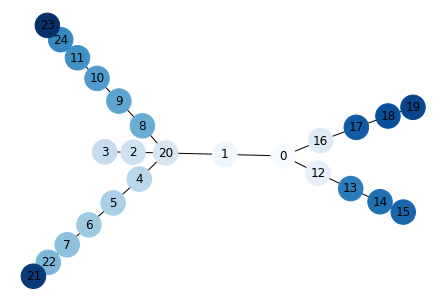

In [5]:
pos = nx.spring_layout(g2, iterations=100)
nx.draw(g2, pos, node_color=range(len(g2.nodes)), node_size=600, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(g, pos)
plt.show()
pos = nx.spring_layout(g, iterations=200)
nx.draw(g, pos, node_color=range(25), node_size=600, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(g, pos)
plt.show()

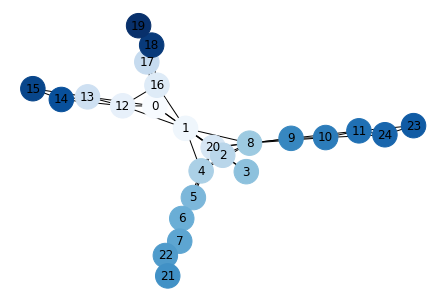

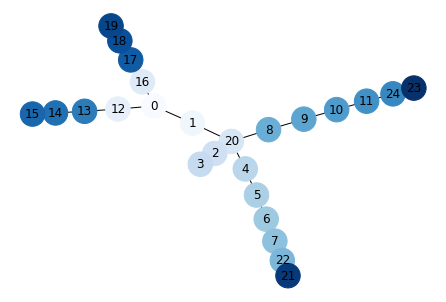

In [6]:
gm = nx.Graph()
gm.add_edges_from(g.edges)
gm.add_edges_from(g2.edges)
pos = nx.spring_layout(gm, iterations=100)
nx.draw(gm, pos, node_color=range(len(gm.nodes)), node_size=600, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(gm, pos)
plt.show()
pos = nx.spring_layout(g, iterations=200)
nx.draw(g, pos, node_color=range(25), node_size=600, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(g, pos)
plt.show()